In [1]:
%matplotlib inline
import graph_tool.all as gt
from braids import *        # All the good stuff is in braids.py

Create a random braid with a 25 node network, and a probability that any given node will produce a block in a given `tick` of $$\frac{2^{246}}{2^{256}-1} \simeq 0.1\%.$$
With 25 nodes this means that each "tick" there is a $\sim 2.4\%$ chance that the network will generate a new bead.  This is small, and the resulting graph is close to a blockchain.

The network has a random topology.  Each node is connected to 4 other nodes, with a randomly chosen latency on the interval $[0,1)$.  In other words, the "size" of this network is 1 in time units (think 1 second).  A network with a low target (high dificulty) is blockchain-like, with an occasional diamond in it, which Bitcoin would orphan.  `TICKSIZE=0.1` so time is incremented by a tenth of a second with each iteration, and beads are propagated to connected nodes and delivered after a time interval given by their latency.

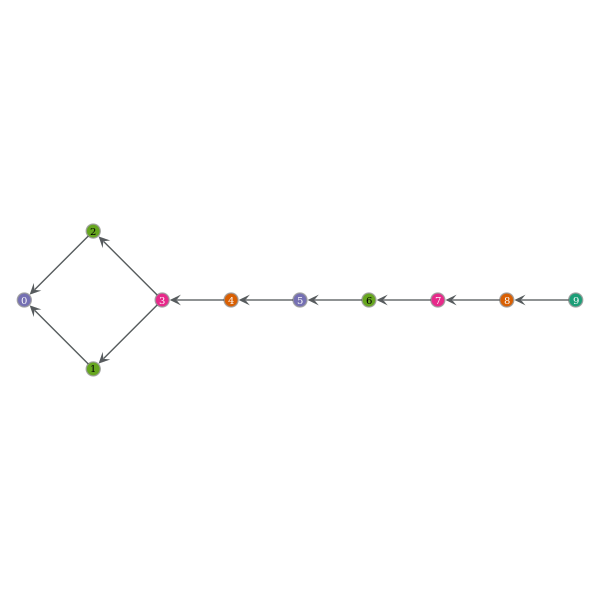

In [2]:
try: del n                         # this is here so that if you re-execute this block, it will create a new network
except: pass
n = Network(25, target=2**246)     # A smaller network or lower target makes thinner braids
for dummy in range(500): n.tick(mine=False)
b = n.nodes[0].braids[0]
b.plot(numbervertices=True);

Keeping the same network `n`, let's increase the target (decrease the difficulty) to produce a thicker braid.  Also, this time let's actually mine, to see that the graphs are the same.  The number of iterations until this node mines a bead is given by the [geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution).  This may give a computational speedup for graphing under the right circumstances.  (It's no speedup with this example)

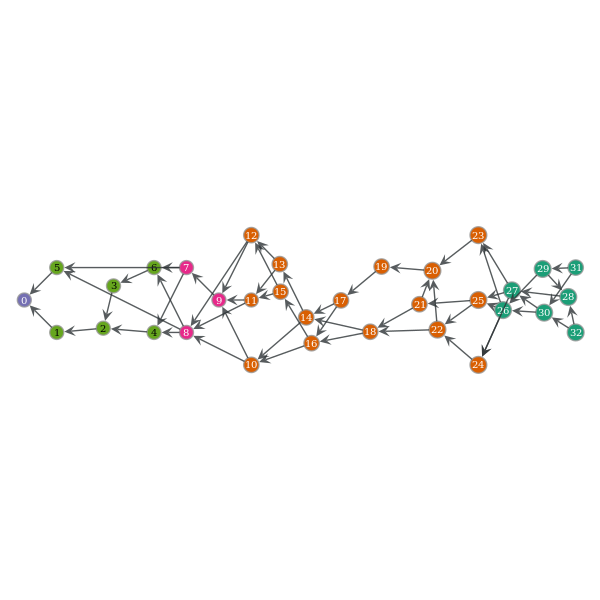

In [12]:
n.reset(target=2**249)
for dummy in range(200): n.tick(mine=True)
b = n.nodes[0].braids[0]
b.plot(numbervertices=True);

The above graph layout is in the `braids.py` file and fixes the locations of the first and last beads in a cohort, and uses `graph_tool`'s spring-block layout for the rest.  Sometimes it makes very messy graphs.  So let's try the spring-block layout by itself.  Note this layout is random and won't always put the genesis block on the left...

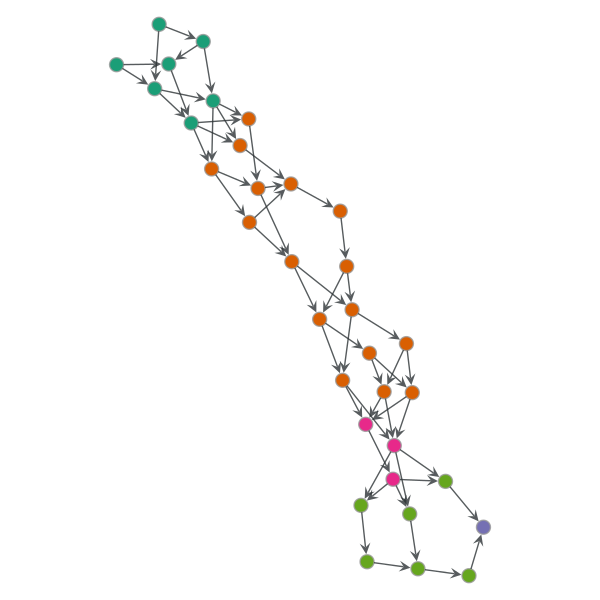

In [13]:
b.plot(layout=gt.sfdp_layout);

For playing with layout, the most interesting parameters are `K` (edge length) and `C` (repulsive force strength), and `mu` (attractive force strength within a cohort).

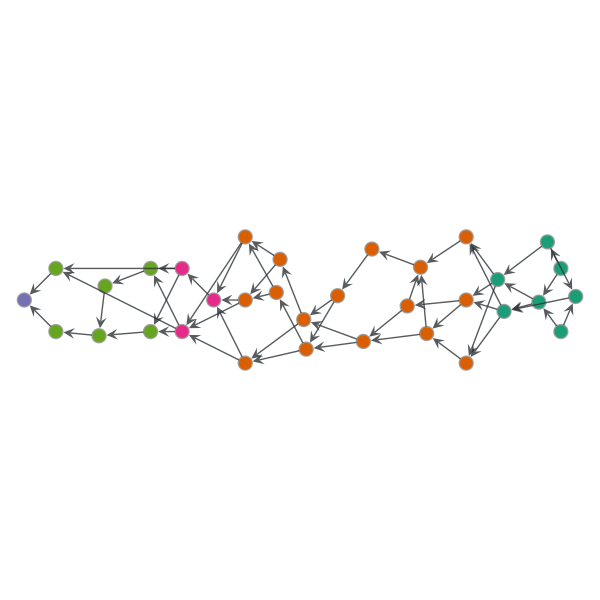

In [14]:
b.plot(K=2, C=0.2);

You can also pass these options to the sfdp layout.

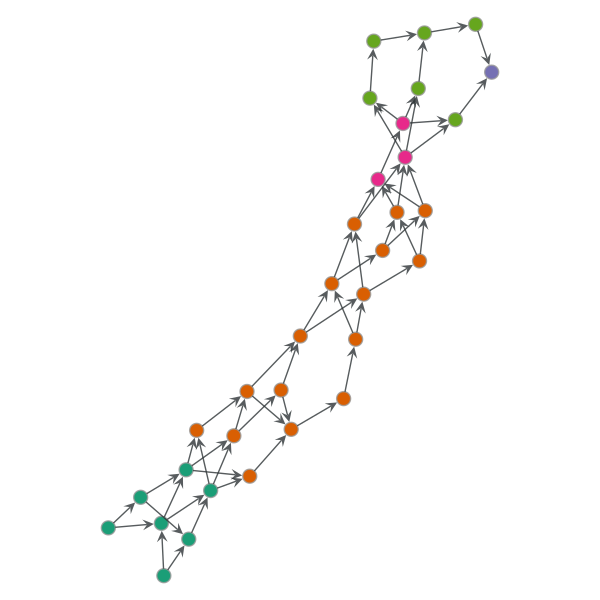

In [15]:
b.plot(layout=gt.sfdp_layout, K=2, C=0.2, mu=0.0001);

The preceeding few boxes are purely for visual display purposes, and have no impact on the running of a network.

Let's turn to how to evaluate a rewards algorithm on a network.  Let's choose one bead to focus on and examine its sibling structure. Siblings are beads in the same cohort that cannot be decided to come before or after one another, since the network is asychronous (they were mined by miners on opposite sides of the planet at nearly the same time).  These might contain the same transaction.  

Siblings are labeled by the number of beads in the (ancestor, descendant) direction (called "rank") one must travel **from the sibling** to find a common ancestor.  The black-circled bead is the one under consideratoin, and its siblings are labeled by their rank (m,n).

This quantity, or something similar, might be used in evaluating rewards for miners.  It gives a measure based on graph structure alone of which beads might have been withheld.

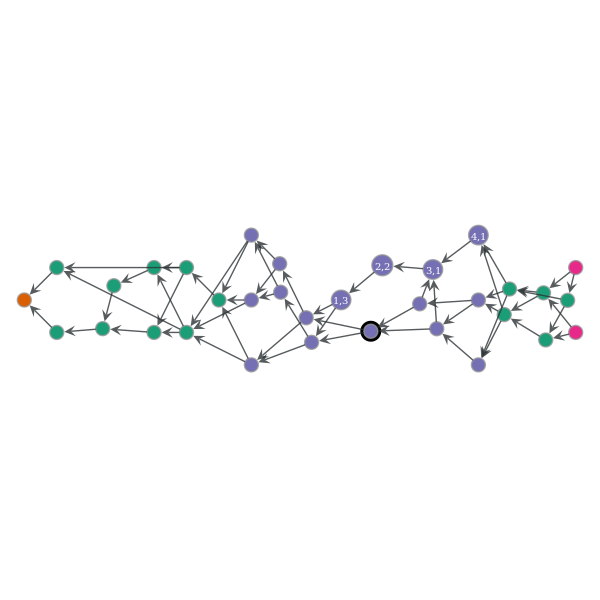

In [16]:
b.plot(focusbead=b.vertex(b.num_vertices()/2+2));

Now let's play with the reward model.  (Modify `Braid.rewards(...)` to try a different model)

If we assume a fixed reward per cohort, and that within the cohort we distribute rewards proportionally, we end up with a graph like the following. (Note that this is not a very good reward model)  The *area* of each cohort is equal, if you sum the areas of the constituent beads.  Area proportionality is done purely for an intuitive visual representation.

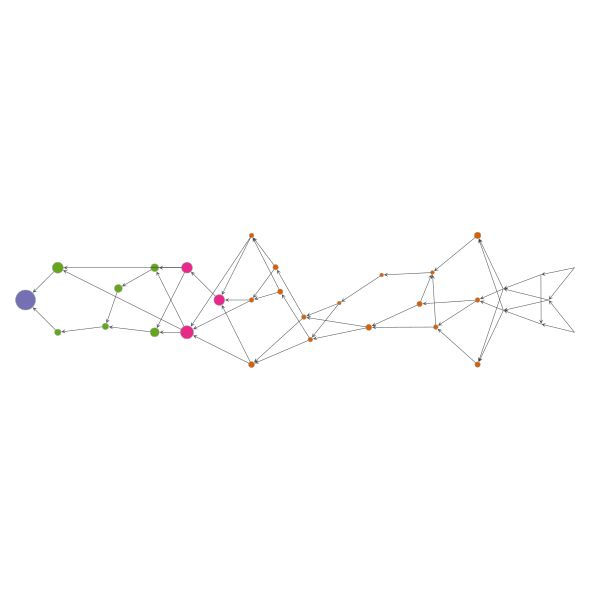

In [17]:
b.plot(rewards=True, K=1.8);